# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Observable trends
#higher latitudes tend to have lower Max Temps
#humidity and latitude don't seem to have correlation
#wind speed and latitude don't seem to have correlation


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #was size 1500
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

temp= []
max_temp = []
humidity = []
wind_speed = []
clouds = []
city_lat = []
city_lon = []
country = []
thedate = []
i = 0
for city in cities:  
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        city_lat.append(response['coord']['lat'])
        city_lon.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        thedate.append(response['dt'])
        
        print(f"The city of {city} has a temp of {temp[i]} F. Importing {i+1} of {len(cities)}")
        i = i + 1
    except KeyError:
        print(f"Key Error moving on...")

print(f"There were {len(cities) - i} exceptions out of {len(cities)}.")  



Key Error moving on...
The city of tshikapa has a temp of 107.28 F. Importing 1 of 611
The city of tuy hoa has a temp of 80.83 F. Importing 2 of 611
The city of caravelas has a temp of 79.5 F. Importing 3 of 611
The city of cabo san lucas has a temp of 78.6 F. Importing 4 of 611
The city of sitka has a temp of 53.6 F. Importing 5 of 611
The city of hilo has a temp of 63.43 F. Importing 6 of 611
The city of castro has a temp of 61.95 F. Importing 7 of 611
The city of bluff has a temp of 46.36 F. Importing 8 of 611
The city of tasiilaq has a temp of 51.8 F. Importing 9 of 611
The city of rikitea has a temp of 71.44 F. Importing 10 of 611
The city of puerto ayora has a temp of 64.99 F. Importing 11 of 611
The city of bulgan has a temp of 52.83 F. Importing 12 of 611
The city of suicheng has a temp of 81.99 F. Importing 13 of 611
The city of bandarbeyla has a temp of 83.05 F. Importing 14 of 611
The city of barrow has a temp of 42.8 F. Importing 15 of 611
The city of hakkari has a temp of 

The city of denpasar has a temp of 78.8 F. Importing 127 of 611
The city of saurimo has a temp of 89.6 F. Importing 128 of 611
The city of la ronge has a temp of 64.4 F. Importing 129 of 611
The city of luderitz has a temp of 69.39 F. Importing 130 of 611
The city of mattru has a temp of 82.85 F. Importing 131 of 611
The city of sur has a temp of 92.23 F. Importing 132 of 611
The city of vila has a temp of 69.01 F. Importing 133 of 611
The city of provideniya has a temp of 49.19 F. Importing 134 of 611
The city of jawad has a temp of 80.83 F. Importing 135 of 611
Key Error moving on...
Key Error moving on...
The city of dunedin has a temp of 46 F. Importing 136 of 611
The city of chifeng has a temp of 61.59 F. Importing 137 of 611
The city of elko has a temp of 63.99 F. Importing 138 of 611
The city of karratha has a temp of 69.1 F. Importing 139 of 611
The city of lucapa has a temp of 100.76 F. Importing 140 of 611
The city of sao filipe has a temp of 79.99 F. Importing 141 of 611
The

The city of dondo has a temp of 80.29 F. Importing 249 of 611
The city of zaragoza has a temp of 80.87 F. Importing 250 of 611
The city of marsh harbour has a temp of 84.34 F. Importing 251 of 611
The city of vaitape has a temp of 78.69 F. Importing 252 of 611
The city of rawson has a temp of 41.45 F. Importing 253 of 611
The city of esperance has a temp of 51.8 F. Importing 254 of 611
The city of touros has a temp of 82.4 F. Importing 255 of 611
The city of ajaccio has a temp of 84.2 F. Importing 256 of 611
The city of chuy has a temp of 55.22 F. Importing 257 of 611
The city of raga has a temp of 84.9 F. Importing 258 of 611
The city of yining has a temp of 79.81 F. Importing 259 of 611
The city of jinchang has a temp of 77.04 F. Importing 260 of 611
Key Error moving on...
The city of shaunavon has a temp of 70.54 F. Importing 261 of 611
The city of shelburne has a temp of 62.65 F. Importing 262 of 611
The city of ilulissat has a temp of 48.2 F. Importing 263 of 611
The city of jalu 

The city of banjar has a temp of 78.8 F. Importing 374 of 611
The city of tessalit has a temp of 106.61 F. Importing 375 of 611
The city of oktyabrskoye has a temp of 80.6 F. Importing 376 of 611
The city of krasnokamensk has a temp of 49.35 F. Importing 377 of 611
Key Error moving on...
The city of manono has a temp of 102.38 F. Importing 378 of 611
The city of nisia floresta has a temp of 81.5 F. Importing 379 of 611
The city of catuday has a temp of 80.6 F. Importing 380 of 611
The city of kaabong has a temp of 74.01 F. Importing 381 of 611
The city of kenai has a temp of 52.25 F. Importing 382 of 611
The city of nara has a temp of 85.08 F. Importing 383 of 611
The city of kindersley has a temp of 53.6 F. Importing 384 of 611
The city of springdale has a temp of 66.34 F. Importing 385 of 611
The city of knysna has a temp of 50 F. Importing 386 of 611
The city of shanghai has a temp of 85.39 F. Importing 387 of 611
The city of cidreira has a temp of 63.72 F. Importing 388 of 611
The 

The city of markovo has a temp of 58.42 F. Importing 497 of 611
The city of ambrolauri has a temp of 82.4 F. Importing 498 of 611
Key Error moving on...
The city of kudahuvadhoo has a temp of 83.77 F. Importing 499 of 611
The city of beringovskiy has a temp of 49.44 F. Importing 500 of 611
The city of hovd has a temp of 69.26 F. Importing 501 of 611
The city of kununurra has a temp of 77 F. Importing 502 of 611
The city of warri has a temp of 87.96 F. Importing 503 of 611
The city of vila velha has a temp of 78.71 F. Importing 504 of 611
The city of kiama has a temp of 53.11 F. Importing 505 of 611
The city of stornoway has a temp of 67.12 F. Importing 506 of 611
The city of bonavista has a temp of 60.01 F. Importing 507 of 611
The city of jiexiu has a temp of 71.26 F. Importing 508 of 611
The city of acari has a temp of 64.74 F. Importing 509 of 611
The city of micheweni has a temp of 79.47 F. Importing 510 of 611
The city of winchester has a temp of 70.16 F. Importing 511 of 611
The 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df_columns = ["City","Lat","Lon","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]
for i,dates in enumerate(thedate):
    thedate[i] = pd.Timestamp.date(pd.to_datetime(thedate[i]))


cities_df = pd.DataFrame(cities)
city_lat_df = pd.DataFrame(city_lat)
city_lon_df = pd.DataFrame(city_lon)
max_temp_df = pd.DataFrame(max_temp)
humidity_df = pd.DataFrame(humidity)
clouds_df = pd.DataFrame(clouds)
wind_speed_df = pd.DataFrame(wind_speed)
country_df = pd.DataFrame(country)
thedate_df = pd.DataFrame(thedate)

merged = cities_df.merge(city_lat_df, left_index = True, right_index = True)
merged = merged.merge(city_lon_df, left_index = True, right_index = True)
merged = merged.merge(max_temp_df, left_index = True, right_index = True)
merged = merged.merge(humidity_df, left_index = True, right_index = True)
merged = merged.merge(clouds_df, left_index = True, right_index = True)
merged = merged.merge(wind_speed_df, left_index = True, right_index = True)
merged = merged.merge(country_df, left_index = True, right_index = True)
merged = merged.merge(thedate_df, left_index = True, right_index = True)

merged.columns = df_columns

merged.to_csv(output_data_file)


In [5]:
t = merged.loc[merged["Humidity"] > 100]
t


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#NA

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv

#USING CSV DATE FROM HERE ON DUE TO RELOADS AND API RESTRICTIONS
file_to_load = "cities.csv"
data = pd.read_csv(file_to_load,low_memory=False)
data

,Unnamed: 0,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,illoqqortoormiut,-6.42,20.80,107.28,17,78,1.57,CD,1970-01-01
1,1,tshikapa,13.08,109.30,80.83,82,96,5.21,VN,1970-01-01
2,2,tuy hoa,-17.71,-39.25,79.50,62,0,6.91,BR,1970-01-01
3,3,caravelas,22.89,-109.91,79.00,74,40,5.82,MX,1970-01-01
4,4,cabo san lucas,57.05,-135.33,53.60,87,90,2.73,US,1970-01-01
...,...,...,...,...,...,...,...,...,...,...
557,557,santa rosa,-22.82,47.28,66.58,75,71,8.95,MG,1970-01-01
558,558,muzhi,-34.57,146.40,48.20,81,75,5.82,AU,1970-01-01
559,559,kargil,28.66,-17.92,80.60,65,20,13.87,ES,1970-01-01
560,560,benguela,34.78,47.60,100.40,5,0,9.17,IR,1970-01-01


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

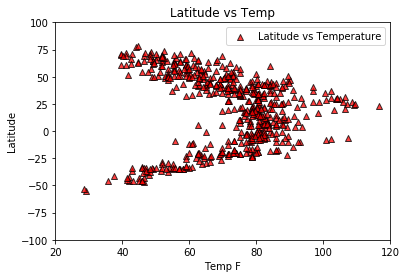

In [29]:

y_axis = data["Lat"]
x_axis = data["Max Temp"]


plt.title("Latitude vs Temp")
plt.ylabel("Latitude")
plt.xlabel("Temp F")

plt.ylim(-100,100)
plt.xlim(20,120)
plt.scatter(x_axis, y_axis, marker="^", facecolors="red", edgecolors="black",  alpha=0.75, label="Latitude vs Temperature")
plt.legend()
plt.plot()
plt.savefig("lat-vs-temp.png",dpi=150)
plt.show()


## Latitude vs. Humidity Plot

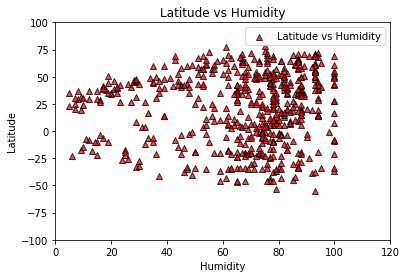

In [30]:

y_axis = data["Lat"]
x_axis = data["Humidity"]


plt.title("Latitude vs Humidity")
plt.ylabel("Latitude")
plt.xlabel("Humidity")

plt.ylim(-100,100)
plt.xlim(0,120)
plt.scatter(x_axis, y_axis, marker="^", facecolors="red", edgecolors="black",  alpha=0.75, label="Latitude vs Humidity")
plt.legend()
plt.plot()
plt.savefig("lat-vs-humidity.png",dpi=150)
plt.show()

## Latitude vs. Cloudiness Plot

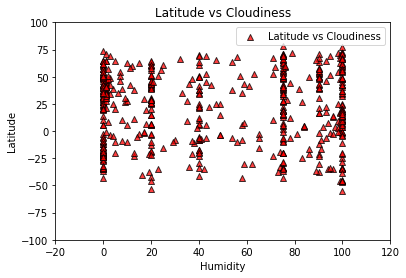

In [31]:
y_axis = data["Lat"]
x_axis = data["Cloudiness"]


plt.title("Latitude vs Cloudiness")
plt.ylabel("Latitude")
plt.xlabel("Humidity")

plt.ylim(-100,100)
plt.xlim(-20,120)
plt.scatter(x_axis, y_axis, marker="^", facecolors="red", edgecolors="black",  alpha=0.75, label="Latitude vs Cloudiness")
plt.legend()
plt.plot()
plt.savefig("lat-vs-cloudiness.png",dpi=150)
plt.show()

## Latitude vs. Wind Speed Plot

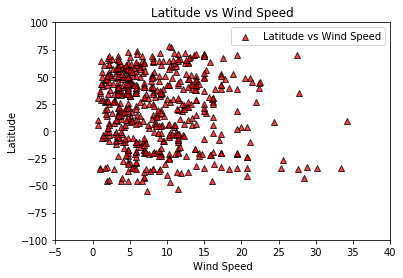

In [32]:
y_axis = data["Lat"]
x_axis = data["Wind Speed"]


plt.title("Latitude vs Wind Speed")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")

plt.ylim(-100,100)
plt.xlim(-5,40)
plt.scatter(x_axis, y_axis, marker="^", facecolors="red", edgecolors="black",  alpha=0.75, label="Latitude vs Wind Speed")
plt.legend()
plt.plot()
plt.savefig("lat-vs-windspeed.png",dpi=150)
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

northern = data.loc[data["Lat"]>=0]
southern = data.loc[data["Lat"]<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

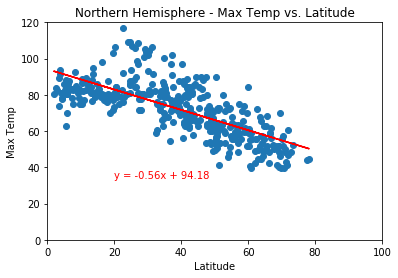

In [33]:

# Calculate the correlation coefficient 
y_axis = northern["Max Temp"]
x_axis = northern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere - Max Temp vs. Latitude")

plt.annotate(line_eq,(20,34),fontsize=10,color="red")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(0,100)
plt.ylim(0,120)
plt.savefig("northern-maxtemp-vs-lat.png",dpi=150)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

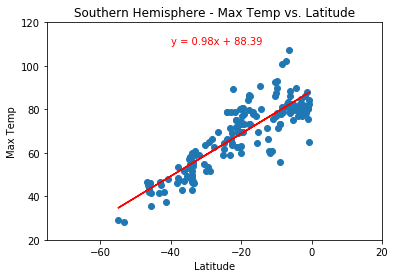

In [34]:

# Calculate the correlation coefficient 
y_axis = southern["Max Temp"]
x_axis = southern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Southern Hemisphere - Max Temp vs. Latitude")

plt.annotate(line_eq,(-40,110),fontsize=10,color="red")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-75,20)
plt.ylim(20,120)
plt.savefig("southern-maxtemp-vs-lat.png",dpi=150)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

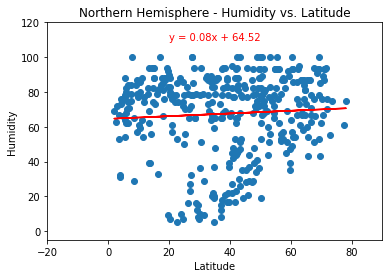

In [35]:

# Calculate the correlation coefficient 
y_axis = northern["Humidity"]
x_axis = northern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere - Humidity vs. Latitude")

plt.annotate(line_eq,(20,110),fontsize=10,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-20,90)
plt.ylim(-5,120)
plt.savefig("northern-humidity-vs-lat.png",dpi=150)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

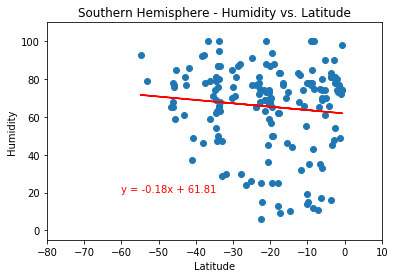

In [36]:

# Calculate the correlation coefficient 
y_axis = southern["Humidity"]
x_axis = southern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Southern Hemisphere - Humidity vs. Latitude")

plt.annotate(line_eq,(-60,20),fontsize=10,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-80,10)
plt.ylim(-5,110)
plt.savefig("southern-humidity-vs-lat.png",dpi=150)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

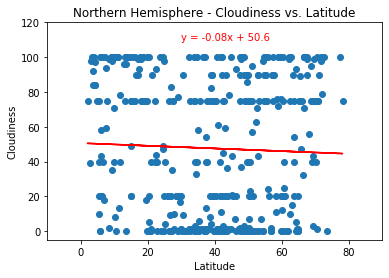

In [37]:

# Calculate the correlation coefficient 
y_axis = northern["Cloudiness"]
x_axis = northern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")

plt.annotate(line_eq,(30,110),fontsize=10,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-10,90)
plt.ylim(-5,120)
plt.savefig("northern-cloudiness-vs-lat.png",dpi=150)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

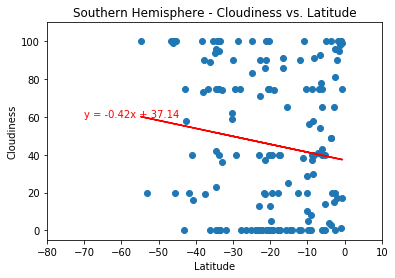

In [38]:

# Calculate the correlation coefficient 
y_axis = southern["Cloudiness"]
x_axis = southern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")

plt.annotate(line_eq,(-70,60),fontsize=10,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-80,10)
plt.ylim(-5,110)
plt.savefig("southern-cloudiness-vs-lat.png",dpi=150)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

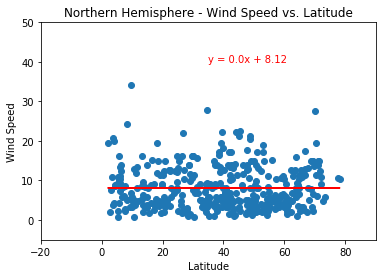

In [39]:

# Calculate the correlation coefficient 
y_axis = northern["Wind Speed"]
x_axis = northern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")

plt.annotate(line_eq,(35,40),fontsize=10,color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-20,90)
plt.ylim(-5,50)
plt.savefig("northern-windspeed-vs-lat.png",dpi=150)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

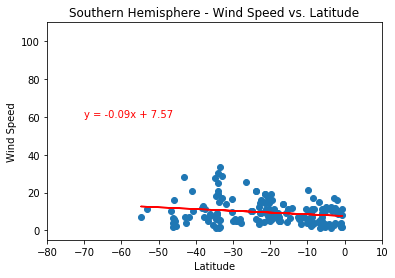

In [40]:

# Calculate the correlation coefficient 
y_axis = southern["Wind Speed"]
x_axis = southern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")

plt.annotate(line_eq,(-70,60),fontsize=10,color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-80,10)
plt.ylim(-5,110)
plt.savefig("southern-windspeed-vs-lat.png",dpi=150)
plt.show()